<a href="https://colab.research.google.com/github/sbutori/autoestudo-semana-4/blob/main/RNN_Autoestudo_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar as bibliotecas

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Gerar os dados da série temporal de forma aleatória, com ruído

In [ ]:
T = 1000  # Número total de pontos
time = np.arange(1, T + 1, dtype=np.float32)
x = np.sin(0.01 * time) + np.random.normal(0, 0.2, (T,))

# Transformar a sequência em tensores da biblioteca PyTorch

In [ ]:
tau = 4
features = np.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:]

# Converter para tensores do PyTorch
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32).reshape(-1, 1)

# Preparar o DataLoader (ferramenta do PyTorch para carregar e fazer batching dos dados)

In [ ]:
batch_size = 16
dataset = TensorDataset(features, labels)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Treinamento do modelo RNN

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Instanciar o modelo, definir a função de perda e o otimizador
model = RNNModel(input_size=1, hidden_size=10, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Treinar o modelo
epochs = 5
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.view(-1, tau, 1)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

# Teste e previsões

In [ ]:
# Fazer previsões com o modelo treinado
with torch.no_grad():
    predictions = model(features.view(-1, tau, 1)).numpy()

# Calcular o erro quadrático médio
mse_rnn = np.mean((predictions - labels.numpy())**2)

# Visualização dos resultados por gráfico e do erro quadrático médio (MSE)

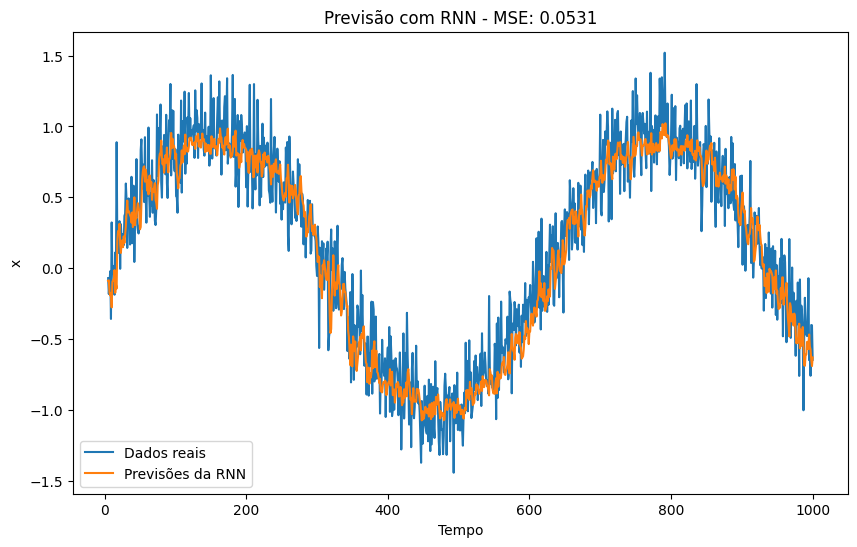

Erro quadrático médio (MSE): 0.053105395287275314


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time[tau:], labels.numpy(), label='Dados reais')
plt.plot(time[tau:], predictions, label='Previsões da RNN')
plt.xlabel('Tempo')
plt.ylabel('x')
plt.legend()
plt.title(f'Previsão com RNN - MSE: {mse_rnn:.4f}')
plt.show()

print(f'Erro quadrático médio (MSE): {mse_rnn}')